Nr 1. <br>
(a) $f(x) = (x³ + \frac{1}{3}) - (x³ - \frac{1}{3})$ <br>
Wann ist die Abweichung mehr als 1 \%?


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#f = (x**3 + (1/3))-(x**3 - (1/3))
t = (2**3 + (1/3))-(2**3 - (1/3))
x=1.0

while abs((2/3) - t) < 0.01 :
    x = x + 10
    t = (x**3 + (1/3))-(x**3 - (1/3))
    
    
print(x,t)

41291.0 0.65625


Beim Ausführen des Codes kommt ein $x = 41291$ und ein $f = 0.65625$ heraus. D.h. bei ca. $41,1 \cdot 10³$ wird die Abweichung größer als 1 \%, was sich danach nur noch erhöhen dürfte. weswegen das Intervall indem die Abweichung größer als 1 \% ist $[41.291,\infty]$. (Aus der Vorlesung geht hervor, dass die Unsicherheiten bei $x \rightarrow \infty$ größer werden (bis 0 herauskommt)))

In [2]:
x = 1.0
t = (2**3 + (1/3))-(2**3 - (1/3))
while t > 1e-10:
    x = x + 10
    t = (np.power(x,3) + (1/3))-(np.power(x,3) - (1/3))
    #t = round((np.power(x,3) + (1/3))-(np.power(x,3) - (1/3)),9)

#np.isclose(t,0.00,atol=1e-02) is not True ist shady as fuck, hat damit nicht funktioniert
print(x,t)

165141.0 0.0


Bei etwa $165.141$ gibt der Rechner als Antwort der Gleichung schon 0 aus.

(b) Nun die Formel $g(x) = \frac{(3 + \frac{x³}{3})-(3-\frac{x³}{3})}{x³}$

In [3]:
s = ((3+(np.power(1,3)/3))-(3-(np.power(1,3)/3)))/(np.power(1,3))
x = 1.0

while abs((2/3) - s) < 0.01 :
    x = x/(1.01)
    s = ((3+(np.power(x,3)/3))-(3-(np.power(x,3)/3)))/np.power(x,3)
    
    
print(x,s)

3.401727404650044e-05 0.6768975548113881


Ab $3.401727404650044 \cdot 10^{-5}$ tritt ein Fehler von mehr als 1 \% auf. Dieser vergrößert sich nur noch, wenn $x \rightarrow 0$. Also ist das Intervall mit einem Fehler von mehr als 1 % von $[3,401727404650044 \cdot 10^{-5}, 0]$

In [4]:
x = 1.0
s = ((3+(np.power(1,3)/3))-(3-(np.power(1,3)/3)))/(np.power(1,3))
while s > 1e-10:
    x = x /(1.01)
    s = ((3+(np.power(x,3)/3))-(3-(np.power(x,3)/3)))/np.power(x,3)

print(x,s)

8.703046431473608e-06 0.0


Bei $8,703046431473608 \cdot 10^{-6}$ gibt der Rechner bereits $0$ für das Ergebnis aus.

(c) Sachen irgendwie plotten?


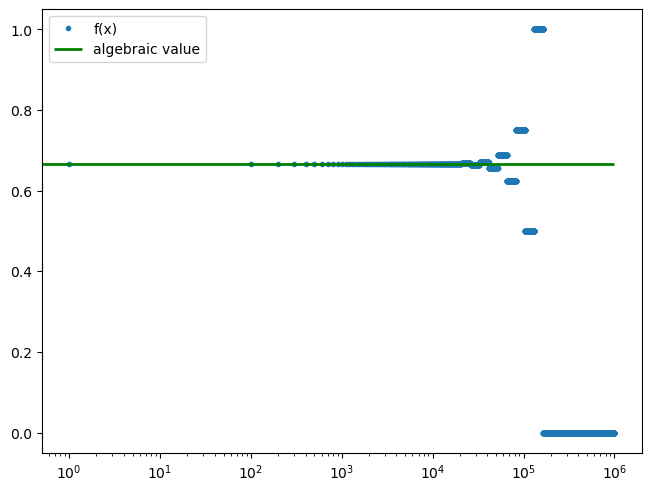

In [5]:
t = (1**3 + (1/3))-(1**3 - (1/3))

x=1.0
x_plot = [1.0]
t_plot = [(1**3 + (1/3))-(1**3 - (1/3))]
while x < 1000000 :
    x = x + 100
    t = (x**3 + (1/3))-(x**3 - (1/3))
    x_plot = x_plot + [x]
    t_plot = t_plot + [t]
    
fig, (ax1) = plt.subplots(1, 1, layout="constrained")
ax1.plot(x_plot, t_plot, ".", label = "f(x)")
ax1.hlines(y = 2/3, xmin = 0, xmax = 1000000, linewidth = 2, linestyle = "-" , color = "green", label = "algebraic value")
#ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend(loc="best")
#print(x_plot,t_plot)

Nach 165141 geht der Graph nur noch mit 0 weiter. Daher habe ich bei $10⁶$ aufgehört zu plotten. 

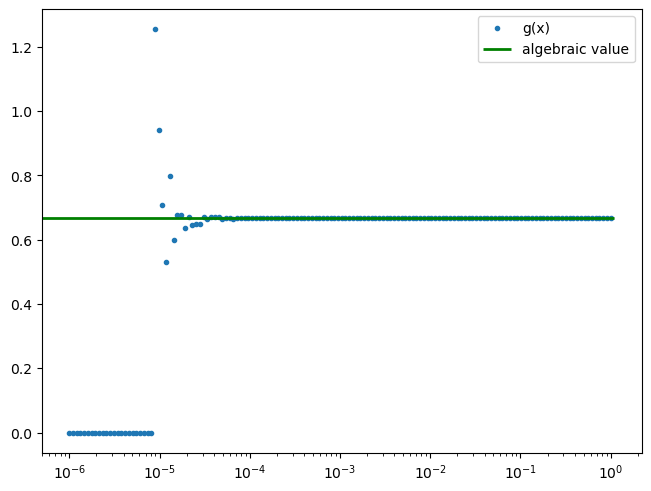

In [6]:
x = 1.0
s = ((3+(np.power(1,3)/3))-(3-(np.power(1,3)/3)))/(np.power(1,3))
x_plot2 = [1.0]
s_plot = [((3+(np.power(1,3)/3))-(3-(np.power(1,3)/3)))/(np.power(1,3))]
while x > 1e-06:
    x = x /(1.1)
    s = ((3+(np.power(x,3)/3))-(3-(np.power(x,3)/3)))/np.power(x,3)
    x_plot2 = x_plot2 + [x]
    s_plot = s_plot + [s]

fig, (ax2) = plt.subplots(1, 1, layout="constrained")
ax2.plot(x_plot2, s_plot, ".", label = "g(x)")
ax2.hlines(y = 2/3, xmin = 0, xmax = 1.1, linewidth = 2, linestyle = "-" , color = "green", label = "algebraic value")
#ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.legend(loc="best")
#print(x_plot,t_plot)

Eventuell geht das ja auch alles viel einfacher, der Versuch kommt jetzt:

In [7]:
np.float64(1/3)

0.3333333333333333

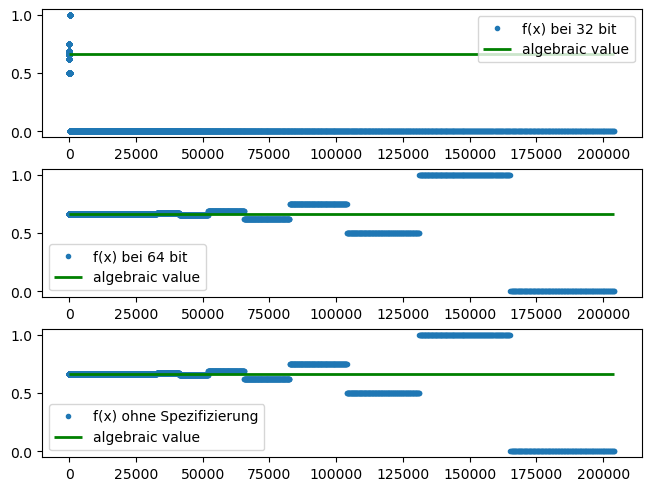

In [8]:
x_exp = np.logspace(0,5.31,10000)
x_exp_32 = np.logspace(0, 5.31, 10000, dtype='float32')
x_exp_64 = np.logspace(0, 5.31, 10000, dtype='float64')

#np.float64(1/3)

def func_f(x):
    f = (x**3 + (1/3))-(x**3 - (1/3)) 
    return f

fig, (ax3, ax4,ax5) = plt.subplots(3, 1, layout="constrained")
ax3.plot(x_exp_32, func_f(x_exp_32), ".", label = "f(x) bei 32 bit")
ax3.hlines(y = 2/3, xmin = 0, xmax = np.power(10,5.31), linewidth = 2, linestyle = "-" , color = "green", label = "algebraic value")
#ax1.set_yscale('log')
ax3.legend(loc="best")
ax4.plot(x_exp_64, func_f(x_exp_64), ".", label = "f(x) bei 64 bit")
ax4.hlines(y = 2/3, xmin = 0, xmax = np.power(10,5.31), linewidth = 2, linestyle = "-" , color = "green", label = "algebraic value")
ax4.legend(loc="best")
ax5.plot(x_exp, func_f(x_exp), ".", label = "f(x) ohne Spezifizierung")
ax5.hlines(y = 2/3, xmin = 0, xmax = np.power(10,5.31), linewidth = 2, linestyle = "-" , color = "green", label = "algebraic value")
ax5.legend(loc="best")

Ich vermute mal, dass man jetzt sehen sollte, dass die Fehler bei der 32 bit Variante höher sind, aber ich kann da wirklich keinen Unterschied erkennen. Aber apparently ist es ja nicht ganz ganz gleich. Ich denke mal die Unterschiede sind zu klein, um sie zu sehen.

Jetzt kommt der andere Graph, mal schauen wie es hier läuft.

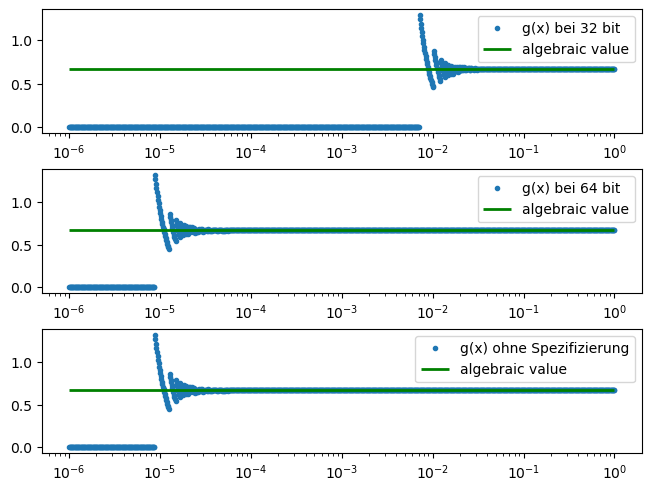

In [17]:
x_g = np.logspace(-6,0,1000)
x_g_32 = np.logspace(-6,0, 1000, dtype='float32')
x_g_64 = np.logspace(-6,0, 1000, dtype='float64')
#print(x_g)

def func_g(x):
    g = ((3+((x**3)/3))-(3-((x**3)/3)))/(x**3)
    return g 

fig, (ax6, ax7, ax8) = plt.subplots(3, 1, layout="constrained")
ax6.plot(x_g_32, func_g(x_g_32), ".", label = "g(x) bei 32 bit")
ax6.hlines(y = 2/3, xmin = 1e-06, xmax = 1, linewidth = 2, linestyle = "-" , color = "green", label = "algebraic value")
ax6.legend(loc="best")
ax6.set_xscale('log')
ax7.plot(x_g_64, func_g(x_g_64), ".", label = "g(x) bei 64 bit")
ax7.hlines(y = 2/3, xmin = 1e-06, xmax = 1, linewidth = 2, linestyle = "-" , color = "green", label = "algebraic value")
ax7.legend(loc="best")
ax7.set_xscale('log')
ax8.plot(x_g, func_g(x_g), ".", label = "g(x) ohne Spezifizierung")
ax8.hlines(y = 2/3, xmin = 1e-06, xmax = 1, linewidth = 2, linestyle = "-" , color = "green", label = "algebraic value")
ax8.legend(loc="best")
ax8.set_xscale('log')
